<a href="https://colab.research.google.com/github/Febro24/Netflix_data_analysis_2021/blob/main/Netflix_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections
dataset=pd.read_csv('/content/drive/MyDrive/Classroom/netflix1.csv')

In [ ]:
dataset.head()#to show first 5 rows

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,9/25/2021,2020,PG-13,90 min,Documentaries
1,s3,TV Show,Ganglands,Julien Leclercq,France,9/24/2021,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,9/24/2021,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,9/22/2021,2021,TV-PG,91 min,"Children & Family Movies, Comedies"
4,s8,Movie,Sankofa,Haile Gerima,United States,9/24/2021,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies"


In [ ]:
dataset.isnull().sum()#chcecking missing values

,0
show_id,0
type,0
title,0
director,0
country,0
date_added,0
release_year,0
rating,0
duration,0
listed_in,0


In [ ]:
dataset.duplicated().sum()#checking duplicated values

0

In [ ]:
dataset.shape

(8790, 10)

In [ ]:
dataset['type'].unique()



array(['Movie', 'TV Show'], dtype=object)

In [ ]:
dataset['rating'].unique()

array(['PG-13', 'TV-MA', 'TV-PG', 'TV-14', 'TV-Y7', 'TV-Y', 'PG', 'TV-G',
       'R', 'G', 'NC-17', 'NR', 'TV-Y7-FV', 'UR'], dtype=object)

In [ ]:
dataset['country'].nunique()

86

<ipython-input-9-c3048292bd55>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=dataset['type'], palette='coolwarm')


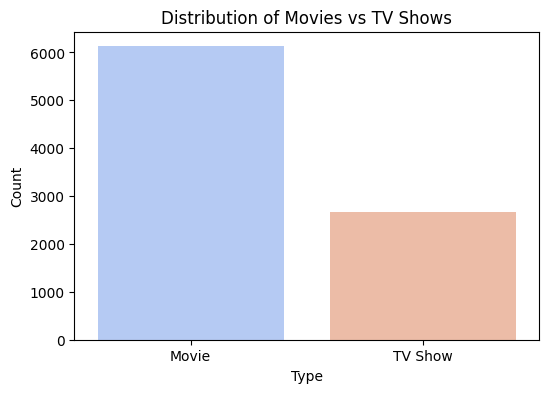

In [ ]:
#EDA ANALYSIS
#1,MOVIE VS TV SHOW

# Countplot for type distribution
plt.figure(figsize=(6,4))
sns.countplot(x=dataset['type'], palette='coolwarm')
plt.title('Distribution of Movies vs TV Shows')
plt.xlabel('Type')
plt.ylabel('Count')
plt.show()


<ipython-input-10-10130546457b>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=dataset['rating'], order=dataset['rating'].value_counts().index, palette='viridis')


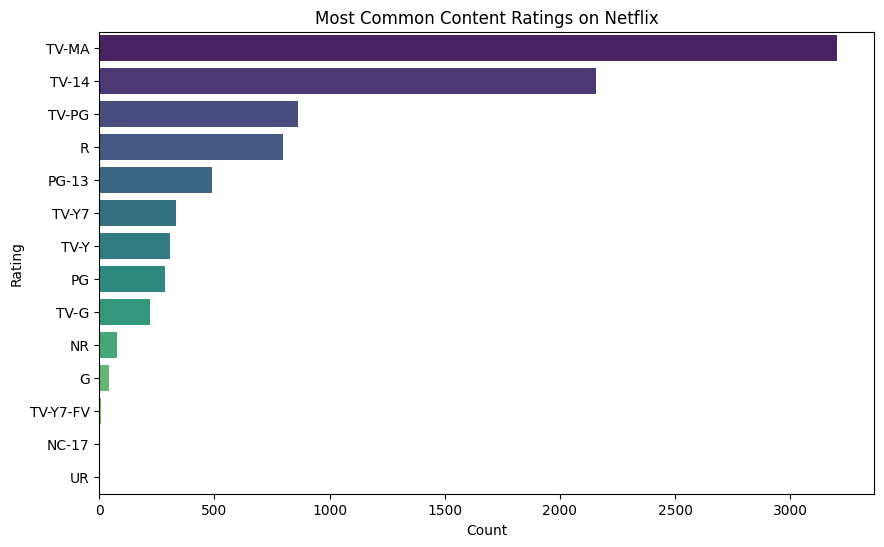

In [ ]:
#2,COMMON RATING
plt.figure(figsize=(10,6))
sns.countplot(y=dataset['rating'], order=dataset['rating'].value_counts().index, palette='viridis')
plt.title('Most Common Content Ratings on Netflix')
plt.xlabel('Count')
plt.ylabel('Rating')
plt.show()

<ipython-input-11-3f0e489f685f>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_countries.values, y=top_countries.index, palette='magma')


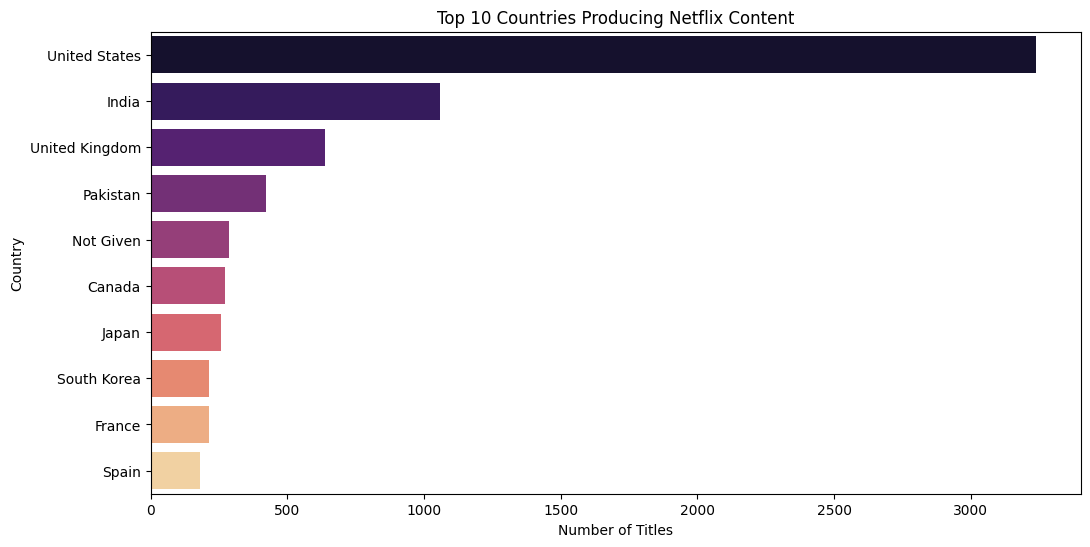

In [ ]:
#TOP 10 COUNTRIES PRODUCING NETFLIX
top_countries = dataset['country'].value_counts().head(10)
plt.figure(figsize=(12,6))
sns.barplot(x=top_countries.values, y=top_countries.index, palette='magma')
plt.title('Top 10 Countries Producing Netflix Content')
plt.xlabel('Number of Titles')
plt.ylabel('Country')
plt.show()

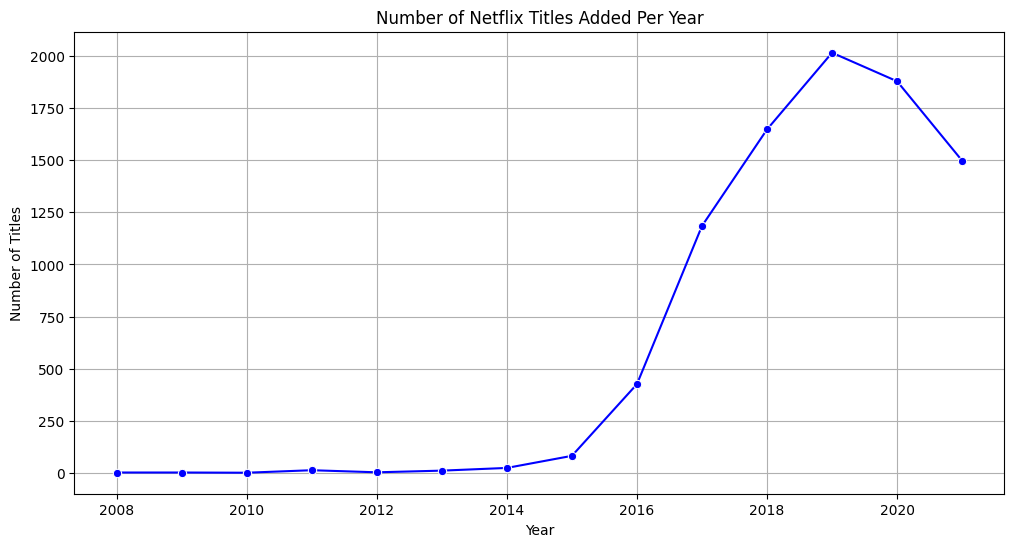

In [ ]:
# Convert 'date_added' to datetime
dataset['date_added'] = pd.to_datetime(dataset['date_added'])

# Extract year from 'date_added'
dataset['year_added'] = dataset['date_added'].dt.year

# Count titles per year
content_by_year = dataset['year_added'].value_counts().sort_index()

# Plot the trend
plt.figure(figsize=(12,6))
sns.lineplot(x=content_by_year.index, y=content_by_year.values, marker='o', color='blue')
plt.title('Number of Netflix Titles Added Per Year')
plt.xlabel('Year')
plt.ylabel('Number of Titles')
plt.grid()
plt.show()

In [ ]:
dataset['year_added'].max()

2021

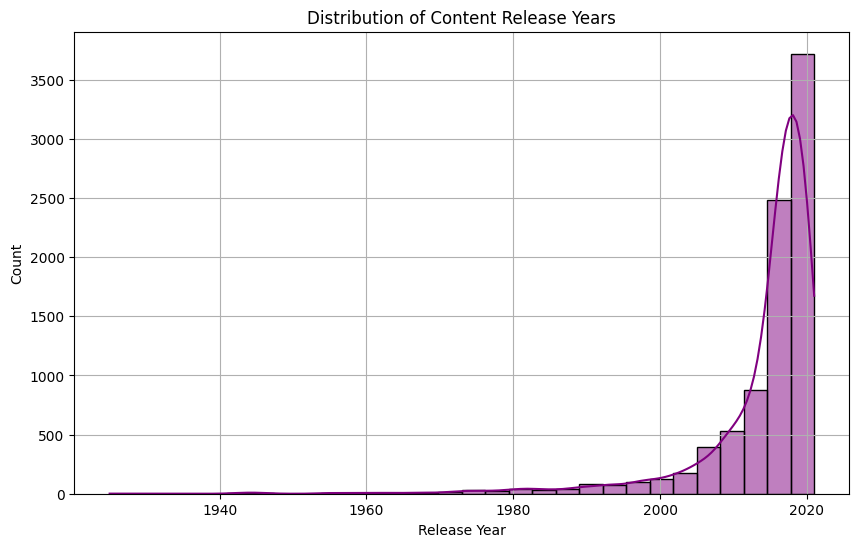

In [ ]:
#most popular release years
plt.figure(figsize=(10,6))
sns.histplot(dataset['release_year'], bins=30, kde=True, color='purple')
plt.title('Distribution of Content Release Years')
plt.xlabel('Release Year')
plt.ylabel('Count')
plt.grid()
plt.show()

<ipython-input-15-bd46bccdf09d>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_df['Count'], y=genre_df['Genre'], palette='plasma')


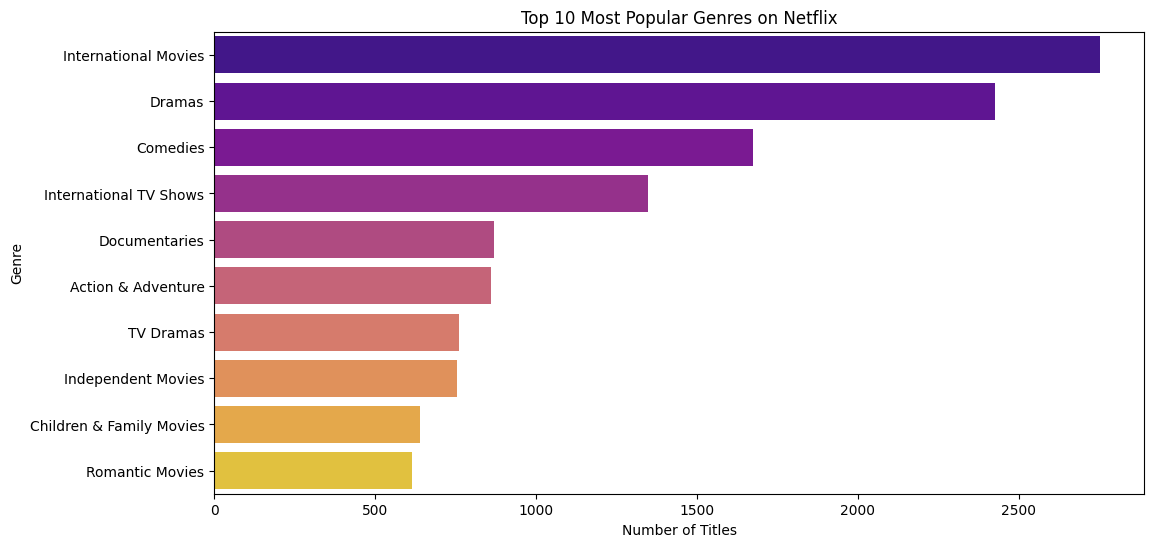

In [ ]:
#popular genres
from collections import Counter

# Split genres and count occurrences
all_genres = ', '.join(dataset['listed_in'].dropna()).split(', ')
genre_counts = Counter(all_genres)

# Convert to DataFrame for visualization
genre_df = pd.DataFrame(genre_counts.items(), columns=['Genre', 'Count'])
genre_df = genre_df.sort_values(by='Count', ascending=False).head(10)

# Plot the most common genres
plt.figure(figsize=(12,6))
sns.barplot(x=genre_df['Count'], y=genre_df['Genre'], palette='plasma')
plt.title('Top 10 Most Popular Genres on Netflix')
plt.xlabel('Number of Titles')
plt.ylabel('Genre')
plt.show()

<ipython-input-16-ad62647c0122>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='rating', y='release_year', data=dataset, palette='coolwarm')


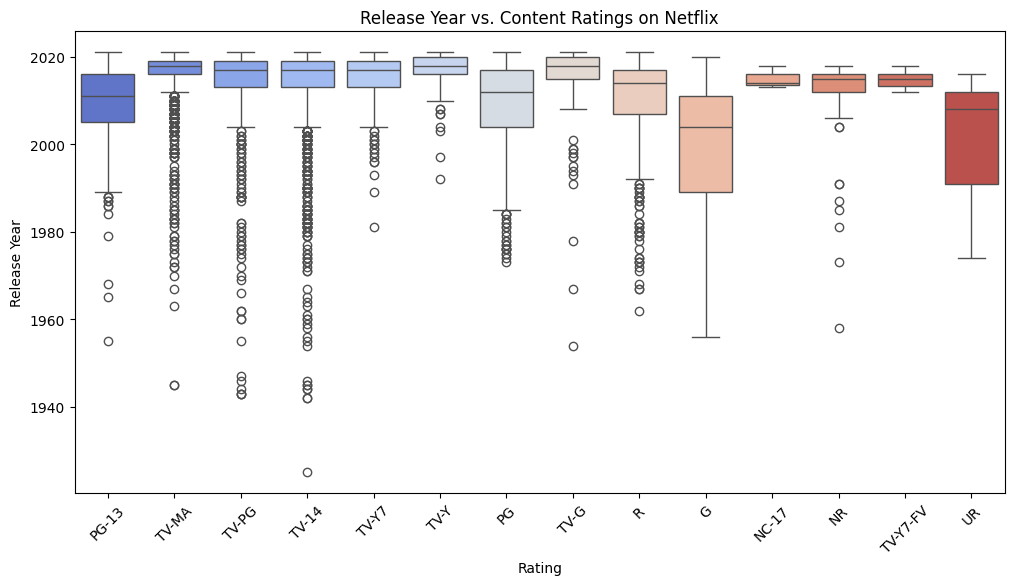

In [ ]:
#correlation analysis
plt.figure(figsize=(12,6))
sns.boxplot(x='rating', y='release_year', data=dataset, palette='coolwarm')
plt.xticks(rotation=45)
plt.title('Release Year vs. Content Ratings on Netflix')
plt.xlabel('Rating')
plt.ylabel('Release Year')
plt.show()

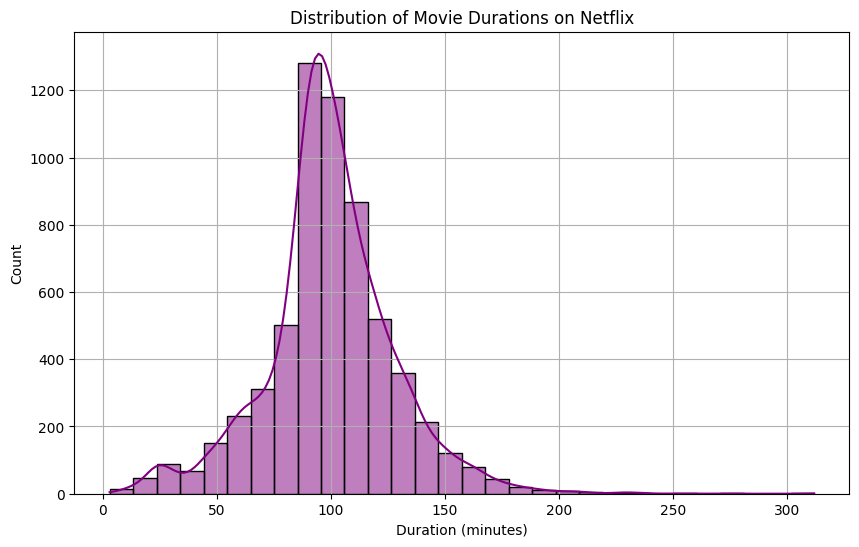

In [ ]:
# Convert 'duration' column into numerical format (for Movies)
dataset['duration'] = dataset['duration'].astype(str)
dataset['duration'] = dataset['duration'].str.replace(' min', '')

# Convert to numeric (ignoring errors for TV Shows)
dataset['duration'] = pd.to_numeric(dataset['duration'], errors='coerce')

# Plot duration distribution
plt.figure(figsize=(10,6))
sns.histplot(dataset['duration'].dropna(), bins=30, kde=True, color='purple')
plt.title('Distribution of Movie Durations on Netflix')
plt.xlabel('Duration (minutes)')
plt.ylabel('Count')
plt.grid()
plt.show()